# 4. Vorlesung

In [1]:
import wntr
import matplotlib.pyplot as plt
import math
from helper import to_cbs, to_ls, plot_results, da

In [2]:
E = 7500 # E/VG
qdm = 120 #l/(Ed)
p_klein = 0.1 # Kleingewerbeanteil
l=4000#m
k2=0.4 #mm

Hgeo_A = 150 #mNN
p_A = 6 #bar
Hgeo_B = 140 #mNN
p_verlust = 1.5 #bar

## Aufgabe 1

In [3]:
fh = 18.1*pow(E, -0.1682)
fd = 3.9*pow(E, -0.0752)

print('f_h', fh)
print('f_d', fd)

f_h 4.0354620766052225
f_d 1.9937008775167244


In [4]:
QdmE = E*qdm
QdmG = QdmE*p_klein

Qdm = (QdmE + QdmG)/1000
print(Qdm, 'm³/d')

990.0 m³/d


In [5]:
QLö = 96.0 #m³/h

**Lastfälle**

In [6]:
QB_I = Qdm/24*fh/3.6
print('Lastfall 1:', QB_I , 'l/s' )

Lastfall 1: 46.23966962776818 l/s


In [7]:
QB_II = (Qdm/24*fh/fd + QLö)/3.6
print('Lastfall 2:', QB_II, 'l/s' )

Lastfall 2: 49.859548883462644 l/s


erforderliche Druckhöhe im Punkt B

In [8]:
p_v_min = 35 #mNN für 4 geschossige Bebauung
Herf_B = Hgeo_B + p_v_min +p_verlust*10
print(Herf_B)

190.0


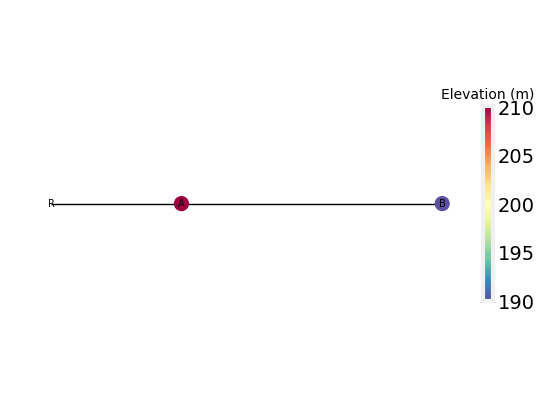

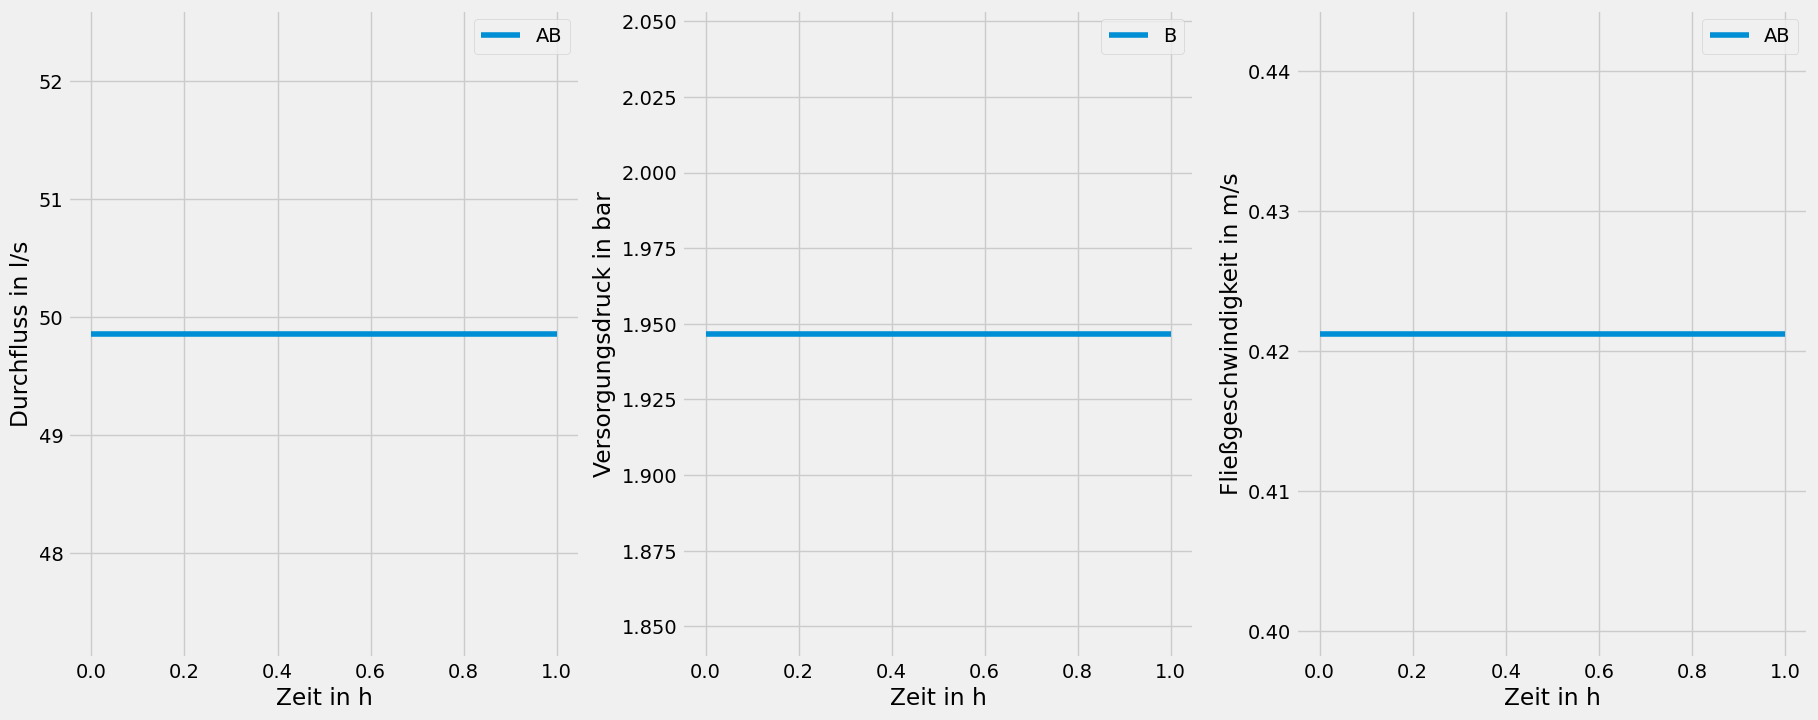

In [9]:
# neues Modell erstellen
wn = wntr.network.WaterNetworkModel()
wn.options.hydraulic.demand_model = 'PDD'


wn.add_pattern('pat', [1])

# Knoten generieren
wn.add_junction('A', base_demand=0, demand_pattern='pat', elevation=(Hgeo_A+p_A*10), coordinates=(0,0))

wn.add_junction('B', base_demand=to_cbs(QB_II), demand_pattern='pat', elevation=Herf_B, coordinates=(2,0))

# Rohrnetzwerk erstellen
wn.add_pipe('AB', 'A', 'B', length=l, diameter=da[250], roughness=k2*1000)


# Hochbehälter
wn.add_reservoir('R', base_head=(Hgeo_A+p_A*10), coordinates=(-1,0))
wn.add_pipe('TA', 'R', 'A', length=1, diameter=da[315], roughness=100)

# Simulation
wn.options.time.duration = 1*3600
sim = wntr.sim.WNTRSimulator(wn)
results = sim.run_sim()

# Ergebnisse darstellen
plot_results(wn, results, drop_junction=['R', 'A'], drop_link=['TA'])